# Lambda Ausdrücke und funktionale Programmierung

#### Marcel Lüthi <br/> Departement Mathematik und Informatik

# Agenda

* Geschichte: Objektorientierte und Funktionale Programmierung
* Funktionen als Objekte
* Lambda Audrücke in Java

* Case study: Funktionale Programmierung in Java


# Geschichte:  Objektorientierte und Funktionale Programmierung

# Erste Programmierung

```assembly
SUMDIGIN CSECT
         USING  SUMDIGIN,R13       base register
         B      72(R15)            skip savearea
         DC     17F'0'             savearea
         STM    R14,R12,12(R13)    prolog
         ST     R13,4(R15)         " <-
         ST     R15,8(R13)         " ->
         LR     R13,R15            " addressability
         LA     R11,NUMBERS        @numbers
         LA     R8,1               k=1
LOOPK    CH     R8,=H'4'           do k=1 to hbound(numbers)
         BH     ELOOPK             "
         SR     R10,R10              sum=0
         LA     R7,1                 j=1
LOOPJ    CH     R7,=H'8'             do j=1 to length(number)
         BH     ELOOPJ               "
         LR     R4,R11                 @number
         BCTR   R4,0                   -1
         AR     R4,R7                  +j
         MVC    D,0(R4)                d=substr(number,j,1)
         SR     R9,R9                  ii=0
         SR     R6,R6                  i=0
LOOPI    CH     R6,=H'15'              do i=0 to 15
         BH     ELOOPI                 "
         LA     R4,DIGITS                @digits
         AR     R4,R6                    i
         MVC    C,0(R4)                  c=substr(digits,i+1,1)
         CLC    D,C                      if d=c
         BNE    NOTEQ                    then
         LR     R9,R6                      ii=i
         B      ELOOPI                     leave i
NOTEQ    LA     R6,1(R6)                 i=i+1
         B      LOOPI                  end do i
ELOOPI   AR     R10,R9                 sum=sum+ii
         LA     R7,1(R7)               j=j+1
         B      LOOPJ                end do j
ELOOPJ   MVC    PG(8),0(R11)         number
         XDECO  R10,XDEC             edit sum
         MVC    PG+8(8),XDEC+4       output sum
         XPRNT  PG,L'PG              print buffer
         LA     R11,8(R11)           @number=@number+8
         LA     R8,1(R8)             k=k+1
         B      LOOPK              end do k
ELOOPK   L      R13,4(0,R13)       epilog 
         LM     R14,R12,12(R13)    " restore
         XR     R15,R15            " rc=0
         BR     R14                exit
DIGITS   DC     CL16'0123456789ABCDEF'
NUMBERS  DC     CL8'1',CL8'1234',CL8'FE',CL8'F0E'
C        DS     CL1
D        DS     CL1
PG       DC     CL16' '            buffer
XDEC     DS     CL12               temp
         YREGS
         END    SUMDIGIN
```

# Erste Hochsprachen

```modula
MODULE SumOFDigits;
FROM STextIO IMPORT
  WriteString, WriteLn;
FROM SWholeIO IMPORT
  WriteInt;
FROM Conversions IMPORT
  StrBaseToLong;
 
PROCEDURE SumOfDigitBase(N: LONGCARD; Base: CARDINAL): CARDINAL;
VAR
  Tmp, LBase: LONGCARD;
  Digit, Sum : CARDINAL;
BEGIN
  Digit := 0;
  Sum   := 0;
  LBase := Base;
  WHILE N > 0 DO
    Tmp := N / LBase;
    Digit := N - LBase * Tmp;
    N := Tmp;
    INC(Sum, Digit);
  END;
  RETURN Sum;
END SumOfDigitBase;
 
VAR
  Num: LONGCARD;
 
BEGIN
  WriteString('   1 sums to '); 
  WriteInt(SumOfDigitBase(1, 10), 1); 
  WriteLn;
  WriteString('1234 sums to '); 
  WriteInt(SumOfDigitBase(1234, 10), 1); 
  WriteLn;
  IF StrBaseToLong('FE', 16, Num) THEN
    WriteString(' $FE sums to '); 
    WriteInt(SumOfDigitBase(Num, 16), 1); 
    WriteLn;
  END;
  IF StrBaseToLong('F0E', 16, Num) THEN
    WriteString('$F0E sums to '); 
    WriteInt(SumOfDigitBase(Num, 16), 1); 
    WriteLn;
  END;
  WriteString('MAX(LONGCARD) (in dec) sums to '); 
  WriteInt(SumOfDigitBase(MAX(LONGCARD), 10), 1); 
  WriteLn;
END SumOFDigits.
```

# Wichtige Frage


> Wie kann man Programme besser strukturieren?

<div style="float:left; width:50%; text-align:left">
    <h3>Funktionale Programmiereung</h3>
    <ul>
        <li> Idee: Komposition von (mathematischen) Funktionen um aus einfachen Teilen komplexe Funktionalität zu bauen </li>
        <li> Mathematische Grundlage: Lambdakalkül</li>
        <li> Aktionen / Berechnungen im Zentrum </li>
    </ul>
</div>
<div style="float:right; width:50%">
    <h3>Objektorientierte Programmiereung</h3>
    <ul>
        <li> Idee: Organisation von Code in "selbstorganisierende" Module (Objekte)</li>        
        <li> Management von Zustand durch Kapselung </li>
        <li> Objekte im Zentrum </li>        
    </ul>

</div>

> Konzepte entwickelt in 60 und 70er Jahren

# Objektorientierte Programmierung

* Durchbruch in der Industrie: 90er Jahre. 
    * Zustandsmanagement in GUIs

![win32](./images/win31.png)


# Funktionale Programmierung

* Durchbruch in der Industrie: 2010er Jahre 
    * Parallelisierung / Multi-core computing

![moores law](images./moores-law.png)

# Seiteneffekte


```
   int x = 0; 
   int incrementX() { return ++x; } 
   int decrementX() { return --x; }  
```

- ```decrementX()``` hängt davon ab, wie häufig ich zuvor ```incrementX()``` und ```decrementX()``` aufgerufen habe.
- Zustandsverwaltung ist immer komplex!
    - Schlimm bei paralleler Ausführung, da Reihenfolge nicht immer deterministisch ist.




# Seiteneffektfreie Programmierung
```
  int increment(int x) { return x + 1; } 
  int decrement(int x) { return x - 1; }
```

- ```decrement(5)``` ist immer 4, unabhängig vom Kontext 
- Keine Verwaltung vom Zustand nötig
- Parallelisierung wird einfacher

# Funktionale Konstrukte in Java

> Moderne Programmiersprachen integrieren Konzepte von Funktionalen Sprachen:

* Funktionen als Argumente 
* Anonyme Funktionen
* Closures

# Funktionen und Objekte

# Funktionsobjekte selber erstellen

#### Strategie

1. Deklaration: Interface für Funktionen definieren
```java
interface Function {     
    int apply(int x);
}
```
2. Definition der Funktion: Anonymes Objekt erstellen 

```java
Function square = new Function() {
    public int apply(
    int x) { return x * x; }
}
```

#### Nutzung:

```square.apply(7)```

# Funktionsobjekte selber erstellen

#### Problem
*  Ein Interface für jede Art von Funktion
     
    ```java
    interface FunctionIntString {
       int apply(String x); 
    }
    interface FunctionDoubleString { 
        double apply(String x);
    }
    ...
}
```

#### Lösung
* Generics

# Generische Funktionsobjekte

* Java Generics helfen uns die Funktion nur einmal zu definieren

In [58]:
interface Function<T, R> {     
    R apply(T x);
}



Function<Double, Double> square = new Function<>() { 
    public Double apply(Double x) {
        return x * x;
    }
}

# Anwendungsbeispiel: Funktionen plotten (1)

#### Vorbereitung
* Um in Jupyter Notebooks plotten zu können brauchen wir die Bibliothek xchart
    * Sie müssen Code nicht verstehen

In [82]:
// importieren einer Bibliothek
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;
import java.awt.image.BufferedImage;

# Anwendungsbeispiel: Funktionen plotten (2)

#### Plot Funktionalität

* Funktion plot wertet Funktion an Datenpunkten ```xs``` aus und plottet die Werte.

In [73]:
BufferedImage plot(double[] xs, Function<Double, Double> f) { 
    double[] ys = new double[xs.length];
    for (int i = 0; i < xs.length; ++i) {
        ys[i] = f.apply(xs[i]);
    }
    XYChart chart = QuickChart.getChart("Sample Chart", "X", "Y", "y(x)", xs, ys);
    return BitmapEncoder.getBufferedImage(chart);    
};


# Anwendungsbeispiel: Funktionen plotten (2)

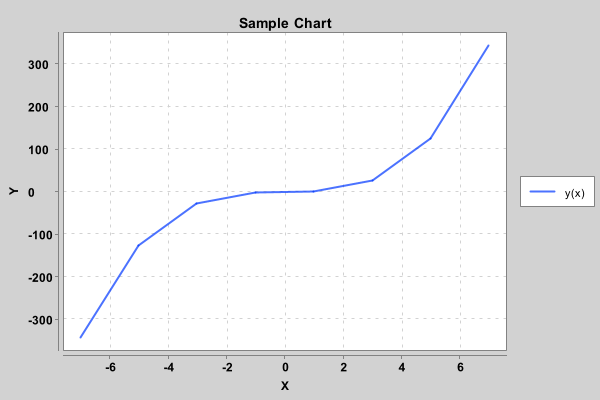

In [92]:
Function<Double, Double> cubic = new Function<>() { 
    public Double apply(Double x) { return x * x * x; } 
};

double[] xs = {-7, -5, -3, -1, 1,3,5,7};
plot(xs, cubic)

# Lambda Ausdrücke

# Lambda Ausdrücke

* Java hat eine spezielle Syntax definiert um Funktionsobjekte zu erstellen. 
* Bekannt als ```lambda Ausdrücke```

> Parameter -> Ausdruck

#### Beispiel
```java
x -> x * x
```

# Plotten mit Lambdas

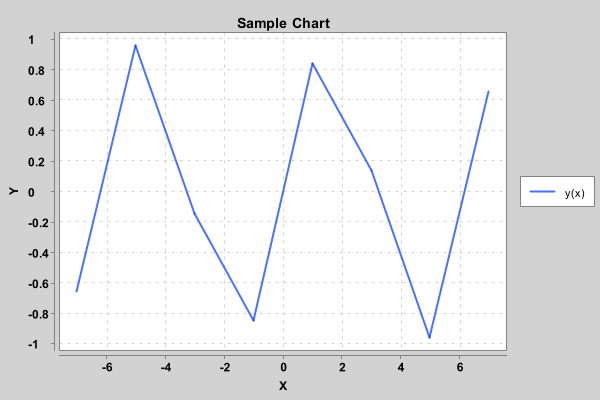

In [99]:
plot(xs, x -> Math.sin(x) );

# Lambda Syntax

```bnf
lambda = ArgList "->" Body
ArgList = Identifier 
         | "(" [Type] Identifier { "," [Type] Identifier } ")" 
         | "()" 
Body = Expression   |  "{" [ Statement ";" ]+ "}"
```

# Functional Interface

* Ein *Functional Interface* ist ein Interface oder Abstrakte Klasse mit genau eine Methode
    * Methode entspricht "Berechnung" der Funktion

### Beispiel:
```java
interface Function<T, R> {
    R apply(T t);
}
```

* Lambda Ausdrücke können an ein *Functional Interface* zugewiesen werden.
   * Lambdas bekommen einen Namen

In [82]:
Function<Double, Double> f = (Double d) -> d * d;

# Lambdas mit Anweisungsblock

* Rechte Seite von Lambda Ausdruck kann beliebiger Block sein
    * Block muss den richtigen Typ zurückliefern


Folgendes funktioniert:

In [87]:
Function<String, Integer> f = (String s) -> { 
    System.out.println(s); 
    return Integer.parseInt(s);
}

Aber hier gibt es einen Typfehler

In [89]:
Function<String, Integer> f = (String s) -> { 
    System.out.println(s); 
    return s;
}

CompilationException: 

# Methodenreferenzen

* Wir können Methoden Functional Interfaces zuweisen:

In [105]:
Function<Double, Double> cos = Math::cos;

und wie eine normale Funktion ausführen:

In [106]:
cos.apply(5.0)

0.28366218546322625

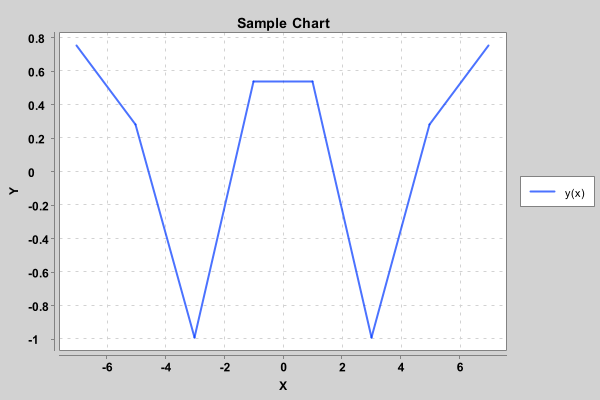

In [107]:
plot(xs, cos)

# Funktionsobjekte mit mehreren Argumenten

* Idee funktioniert für Funktionen mit beliebig vielen Argumenten

In [103]:
interface Function2<S, T, R> {
    R apply(S s, T t);
}

Function2<Double, Double, Double> sum = (x, y) -> x + y;

Function2<Double, Double, String> sumAsString = (x, y) -> new Double(x + y).toString();

# Seitenbemerkung: Sind Lambda's anonyme Innerklassen?

* Erste Implementationen von Lambda Ausdrücken waren nur "Syntactic Sugar".

Ausdruck:

```
Function f  = x -> x*x ;
```
wurde ersetzt durch 
```` 
f  = new Function() {
    int exec (int x) { return x*x; }   
}   
```

> Heute sind die Details etwas komplizierter. 
> * Effiziente Implementation - direkt unterstützt durch JVM

# Case study: Funktionale Listenklasse

* To be completed

# Identität und Funktionskomposition

In [105]:
interface Function<T, R>  {
    
    R apply(T t);
      

      static <T> Function<T, T> identity() { 
        Function<T, T> identity = new Function<>() { 
            public T apply(T x) { return x; } 
        };
        return identity;
    }

    default <S> Function<S, R> compose(Function<S, T> g) { 
    
        Function<S, R> newFun = new Function<>() { 
            public R apply(S x) {            
                return Function.this.apply(g.apply(x));
            }
        };
        return newFun;
        
    }
}

# Identität und Funktionskomposition

In [59]:
Function<Double, Double> square = new Function<>() { 
    public Double apply(Double x) { 
        return x * x; 
    }
};

Function<String, Double> stringToDouble = new Function<>() { 
    public Double apply(String s) {
        return Double.parseDouble(s); 
    }
};


Nutzung:

In [62]:

 Function<Double, Double> ident = Function.identity();
 ident.apply(5.0);

Function<String, Double> fcircg = square.compose(stringToDouble);
fcircg.apply("1e8");

1.0E16

In [43]:
Integer doArithmeticOp(Integer[] array, Function2<Integer, Integer, Integer> op) {
    Integer res = array[0];
    for (int i = 1; i < array.length; ++i) {
        res = op.apply(res, array[i]);
    }
    return res;
}

In [44]:
Integer[] array = {1, 3, 5, 7, 9, 11, 13};
doArithmeticOp(array, sum )

49